A few words looking back at this notebook: 
I have built a few very messy functions that could be explained in the easiest way as "manually built decision trees" to try and control the buying and selling of cards. 

I have managed to build a function that exploits the downspikes seen in the previous notebooks, while failed to make another one (that would seek to use the longer term trends - monotonic increase in prices - for short term gain) work. 

I have also tried to be greedy with selling, but my first attempt at that have failed - though not catastrophically, as it still managed to make profit in the end.

After a bit of testing I can conclude that the algorithm I have created managed to gain significant profit in this isolated scenario, starting with 500\\$ in March and finishing with 724\\$ in July, while briefly peaking at almost 758$.

In this notebook I intend to define a "trading strategy" from the previous experiences. 

After that I shall look at the data that came after the original analysis (this date more or less coincides with the start of the lockdowns so it might or might not be a tragedy) 

I would let the "strategy algorithm" loose on the later data with a fictitous amount of starting money and see what I earn or lose. 

I would also look at all the data with 'hindsight info" to see how much could one make in this period if they were omniscient, but still played with some reasonable rules. 

Obviously my final goal would be to replace the 'algorithm' with a predictive ML model of some sort, but I think even for the most basic - but still working - models would need more information as input (hence the tournament result gathering)

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from glob2 import glob
from sklearn import linear_model

In [557]:
set_names=pd.read_csv("editions.dat",sep=";", names=["URL", "set_name"])
#Load the file which contains the set names
univ_keys=['fair_price', 'isFoil', 'name', 'setName']

In [77]:
#def read(frame, name):# this is a modified version of the prel_plotting, I no longer need to plot
#    pseu_df=pd.read_csv(name+"_unified.csv")
#    pseu_df.date=pseu_df.date.str[:-5].astype('datetime64[D]')#I have no idea why this was ns before tho....
#    #Now remove the ones that on average are under 0.2$ - the previous condition was too 'soft'
#    pseu_df=pseu_df[pseu_df.name.isin(pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False)[pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False).values>0.2].index
#    )]
#    frame=pd.concat([frame, pseu_df])
#    return frame, len(pseu_df.name.unique())
#all_cards=pd.DataFrame()
#for idx, row in set_names.iterrows():
#    all_cards, set_names.loc[idx,"card_count"]=read(all_cards, row["set_name"])
#all_cards=all_cards[~all_cards.date.isin( all_cards.groupby("date")["fair_price"].max()[all_cards.groupby("date")["fair_price"].max()==0].index ) ]
#all_cards=all_cards.drop_duplicates(subset=["date", "name", "setName"])# 
# this whole block is from the prelim_1 notebook

In [87]:
#all_cards=all_cards.reset_index(drop=True)
#all_cards["isFoil"]=(all_cards.setName.str[-4:]=="Foil")
#all_cards#these are not needed anymore, the all_cards will be called from a different csv

,bestVendorBuylist,bestVendorBuylistPrice,countForTrade,date,fair_price,lowestPrice,lowestPriceVendor,name,quantity,setName,isFoil
0,Card Kingdom,0.10,0,2019-11-04,0.39,0.33,StrikeZone,Acclaimed Contender,0,Throne_of_Eldraine,False
1,Card Kingdom,8.00,0,2019-11-04,7.92,7.92,TCG Player,"Alela, Artful Provocateur",0,Throne_of_Eldraine,False
2,Card Kingdom,0.05,0,2019-11-04,0.18,0.18,TCG Player,All That Glitters,0,Throne_of_Eldraine,False
3,Card Kingdom,6.40,0,2019-11-04,7.99,7.99,TCG Player,Arcane Signet,0,Throne_of_Eldraine,False
4,UNDEFINED,0.00,0,2019-11-04,0.16,0.12,Miniature Market,Ardenvale Tactician,0,Throne_of_Eldraine,False
5,Card Kingdom,1.00,0,2019-11-04,1.48,0.99,StrikeZone,"Ayara, First of Locthwain",0,Throne_of_Eldraine,False
6,ABUGames,0.18,0,2019-11-04,1.03,0.49,StrikeZone,Banish into Fable,0,Throne_of_Eldraine,False
7,CoolStuff,1.75,0,2019-11-04,0.59,0.33,StrikeZone,Blacklance Paragon,0,Throne_of_Eldraine,False
8,Card Kingdom,1.70,0,2019-11-04,2.42,2.00,Miniature Market,Bonecrusher Giant,0,Throne_of_Eldraine,False
9,ABUGames,0.01,0,2019-11-04,0.09,0.09,TCG Player,Bramblefort Fink,0,Throne_of_Eldraine,False


In [3]:
#def read(frame, name):# standard first few 
#    pseu_df=pd.read_csv(name+"_unified.csv")
#    pseu_df.date=pseu_df.date.str[:-5].astype('datetime64[ns]')
#    #Now remove the ones that on average are under 0.2$ - the previous condition was too 'soft'
#    pseu_df=pseu_df[pseu_df.name.isin(pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False)[pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False).values>0.2].index
#    )]
#    frame=pd.concat([frame, pseu_df])
#    return frame, len(pseu_df.name.unique())
#all_cards=pd.DataFrame()
#for idx, row in set_names.iterrows():
#    all_cards, set_names.loc[idx,"card_count"]=read(all_cards, row["set_name"])
#all_cards=all_cards[~all_cards.date.isin( all_cards.groupby("date")["fair_price"].max()[all_cards.groupby("date")["fair_price"].max()==0].index ) ]
#all_cards=all_cards.drop_duplicates(subset=["date", "name", "setName"])# 
# this whole block is from the prelim_1 notebook

So what I do now, is I try to build a function that starts from the 2nd of March, and every day reads the prices in and then make decisions - for now based on a set of conditions set by me, later - with more than 1-2 dimensional data (tourney results) - I hope to change to either a decision tree or some kind of prediction. For now, I think this method - while far from being the most efficient - gives the most control and understanding.

I intend to have an object for the money and collection as an input as well as the day's prices (and the previous days, if needed) for the function to make a decision and buy/sell cards accordingly. I will only use the 'fair price' for buying/selling.

I will also have a list that includes all the functions that decide whether I want to buy(/sell) a card or not.


Now let's look at the rules I want to use as a first iteration.

At first I would like to just lay down a few rules that might indicate that a card is worth buying (Selling comes in the next section).

 - Obviously if a "downspike" is happening, that is a good moment to buy. 
 - If the price of the card increases somewhat steadily, that is also a nice indicator. 
 - Obviously, if a card is close to rotation (I can't tell currently what exactly "close" means, since as of writing this, I don't have rotation data...), that is unlikely to raise value. 
 - It is also likely that right before an "up-spike" - if such spike can be predicted - it is wise to buy a card just to sell it the next day. EDIT: after reviewing a few individual cases, these up-spikes are not high (or consistent) enough to be worth predicting. The added risk from the fact that these are overrepresented in cards that will/should lose value makes this approach too risky to be carried out. Maybe if tournament data helps predicting them, this will be revisited.
 - Having tournament data - of course - would be the superior indication method, but currently I don't have any.
 
This list shows 3 rules that will be followed "blindly" for a first result, and then I'll see what can be improved. 

First I'll build the structure of the "collection". I think this can be handled quite easily, as a list. The first list item is the current "money"  have, and the second item shall be a pandas dictionary with the cards currently in the collection - with some basic info such as bought price, maybe current price, the date of purchase and amount. 

From here, I'll define the collection and the three "buying" functions I have in mind so far.
I will start with 500 $, which is not very much, but not a small amount either in the context of MTG - it is about twice the price of a competitive deck.As I intend to trade with foils as well, and that raises the prices significantly, I think this can be a reasonable start

In [620]:
collection=[500, pd.DataFrame(columns=["name","isFoil", "Qtty", "Bought_price", "Current_price","Bought_date" ])] # this is the object that will get passed around by every function
#bought price is average - since that is what I need to exceed in order to sell with a profit...
#This was at the start, but from now I will run a different one
all_cards=pd.read_csv("past_data.csv")
all_cards.date=all_cards.date.astype('datetime64[D]')#this has to happen...

In [605]:
all_cards=pd.read_csv("past_data.csv")
all_cards.date=all_cards.date.astype('datetime64[D]')#this has to happen...

In [728]:
def spiked_down(prev, dates, new_price, today):# prev should be a list of the previous few  prices. dates are ofc the dates corresponding to these prices, new_price is the price for the day, and today is the date for this price.
    #Two things has to happen for me to accept a price as a downspike: It has to be below the predicted and the average of the previous prices. 
    # In addition, I require that the card can't already be in a strong downward trend, since that would undermine the whole goal. 
    regr = linear_model.LinearRegression()
    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
    if pd.Series(prev[-3:]).is_monotonic_decreasing:
        return False
    if new_price >= prev[-1]:
      #  print(str(new_price)+ ">=" +str(prev[-1]))
        return False #...
    if new_price >= pred_price:
      #  print(str(new_price)+ ">=" +str(pred_price))
        return False # The grow was higher than anticipated, so this is defiantely not a down spike
    elif np.mean(prev) < new_price:
     #   print("mean"+str(np.mean(prev))+" <" +str(new_price))
        return False # This means that this is not a meaningful downspike, the card is still worth more than before. 
    elif (prev[-1]-pred_price)*1.5 > prev[-1]-new_price:
      #  print(str((prev[-1]-pred_price)*1.5)+ ">"+str( prev[-1]-new_price))
        return False # this means that the deviation from the predicted price is not significant - it is either a very small bump, or noise
    else:
        return True#Basically, we think this means that I'm in a downspike.

#def raising_value(prev, dates, new_price, today):# a steady increase probably means that the card price will continue to increase. One has to be more caotious with this though.
#    #I will say that if a card increased its value monotonously through 4 datapoints, then probably it will rise further. 
#    #I mean... this could be debated, I know this is slippery, but if something rises for 4 points straight, it hopefully doesn't stop right when I "buy".
#    if not pd.Series(prev[-3:]).is_monotonic_increasing:#So it is translated into series since the initial function doesn't give a pd. Series. A bit of an oversight on my part, but I don't wish to spend more time on this part than I already have...we have nothing to talk about...though the 5 would be a bit excessive...
#        return False 
#    if pd.Series(prev[-3:]).is_monotonic_decreasing:#So it is translated into series since the initial function doesn't give a pd. Series. A bit of an oversight on my part, but I don't wish to spend more time on this part than I already have...we have nothing to talk about...though the 5 would be a bit excessive...
#        return False#There HAS to be a more tasteful way of getting rid of the constant prices, but this was the first that came to my head
#    #If that is already the case, it might be worth "buying in"
#    regr = linear_model.LinearRegression()#Now just check whether or not we are on an "uptick"
#    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
#    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
#    if ((pred_price-prev[-1])*1.5 < new_price-prev[-1]):# This happens if currently we are on a spike (or an even steeper increase)
#        return False
#    elif new_price<prev[-1]: #we're out of luck...
#        return False
#    else:# I feel there should be another condition, but its 2:07 AM so I wouldn't say I can think with the peak of my capacity...
#        return True
###################################################################This function was actively losing money, so I have removed it. Maybe more sophisticated decision trees could salvage it, but I won't build them by hand...                
            
                            
rules_to_buy=[spiked_down, raising_value]# I wanted to have more later, but I don't think I'll put any more time into this sub-optimal manual decision tree...             
        
    

Similarly, one needs rules to sell: 

For selling I'd employ a few rules: I want to 'trade' short-term, so not sitting on a card. This is for two reasons: 1: the 500 $ while not a small amount by any means, is - I suppose - not enough to "sit on" cards waiting for them to gain value. and 2: this data doesn't really let me predict for long term, so there is no expected value behind sitting on a card. The exception is if the card seems to climb in value for weeks, but that should be rare. 


Up-spikes: Obvious selling points, if the price have grown more than 2 times the predicted growth (which would mean a really steep slope), then it should be sold.

If bought < current price:
If the prediction was a downward trend, and now the value have grown again, that can mean two things: 
  - A spike (either the start of an upwards or end of a downwards one): this means that it should sell if we are over the bought value. (bought in the spike or we are in a spike). 
  - noise (very small fluctuations). This would mean, if we are above the average of the mean+2*variance of the previous 5, then this has a good chance not to be noise, and sell. In noise, predict the future price and wait for a spike.

In other cases, predict the next day, and if we can expect higher, then wait. If lower, then sell now for profit.

If current < bought price:
This means that we have already lost money on buying the card.
At first, I wouldn't sell it if it was bought less than 3 days ago.


Either as a result of downward trend or we bought on top of a spike/are currently in a bottom of a spike.

In the case of a downward trend there is an argument to cut the losses and sell. In the other two cases the card should obviously be held. 

If the trend is downward (and the losses should be cut) beyond normal fluctuations that can be checked through:

- if the decrease was monotonous for the past 3 (+ the current) days. - this is clear cut. In this case, if the card can be sold for 2/3 of the original price, I would sell, otherwise just accept the losses and hope for a spike to sell. - such spike would be beyond the noise as described above.

- If the prediction was already a price fall, but the fall is worse than that - check for downspike - I don't want to lose more than I have to.

- If the prediction was a price up, but it fell, try to re-predict for the next day.







In [755]:
#These are the most simplistic functions - when I control the buys, and sell immediately when I think it is worth it... or when I've held onto the card for too long
def cut_losses(prev, dates, new_price, today, bought_price, bought_date):
    #first, If the card is bought very recently, I don't think there is a reason to panic
 #   print(type(today))
  #  print(type(bought_date))
    if (today-bought_date).days<5:
        return False
    else:
        return True#the rest is not needed
      
        
    
    
def sell_gain(prev, dates, new_price, today, bought_price, bought_date):#This comes into play when I already gained value on the card, but might expect to gain more? 
    return True#This as well

    
    
    
def no_changes(prev, dates, new_price, today, bought_price, bought_date):#If we are exactly on the price we bought it is not wise to sell. The simulation doesn't show but there are likely costs associated with this. 
    #If the prediciton is no change (that would mean -aside from a very small chance of a coincidence - the price didn't change at all )
    regr = linear_model.LinearRegression()
    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
    if pred_price==new_price: #stagnates
        return True 
    else:#in the not-so-distant past the price changed, so it might change again. If it changes up, then the gain function will likely sell then.
        return False
    


In [732]:
#This is a bit more complicated than the previous
def sell_card(prev, dates, new_price, today, bought_price, bought_date ):
    my_bool=False#The greenlight for selling
    if bought_price>new_price:#loss_cutting
        my_bool=cut_losses(prev, dates, new_price, today, bought_price, bought_date)
    elif bought_price<new_price:#Already gained.
        my_bool=sell_gain(prev, dates, new_price, today, bought_price, bought_date)
    else:#Might've bought a card that won't change for whatever reason... 
        my_bool=no_changes(prev, dates, new_price, today, bought_price, bought_date)#This basically checks if the card changed anytime recently, I don't want to hold onto 'dead weights'
    return my_bool

def cut_losses(prev, dates, new_price, today, bought_price, bought_date):
    #first, If the card is bought very recently, I don't think there is a reason to panic
 #   print(type(today))
  #  print(type(bought_date))
    if (today-bought_date).days<3:
        return False
    #The following criteria intends do decide whether I should sell the card
    regr = linear_model.LinearRegression()
    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
    if pred_price>new_price:#This means we predicted a higher price. Either a downspike or a steep fall is behind this.
        if not pd.Series(prev[-3:]).is_monotonic_increasing:#This is trouble, try to sell, if the loss is not too big!. For the pd.Series see the comment in func. "raising_value"
            if new_price>bought_price*2/3:
                return True#sell
            else:
                return False#the card already lost a significant portion, might as well keep, hope for an uptick.
        elif (regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))+1)>new_price:# THis is probably a downspike - I could introduce another measures
            #such as a check whether we are significantly below the average price etc.
            return False
        else: # This means that it is not a monotonic decrease, nor a downspike, but it will be worse according to the prediction. I don't think I should get here if I covered everything else well. Sell imho (it might be a mistake)
            return True #Maybe I should also introduce the 2/3 requirement here - or better yet, if so, restructure the decision tree for it to be higher up...?
    else:# We predicted lower. Not using elif b/c frankly I want to explain first with the comments...
        # In this case this might be an up-spike, the slowing of the slope or a steep increase.
        #If its a spike, I want to sell. If not, then of course things seem to turn for the better and wait.
        #Now, I have to try to define a spike in a relatively 'friendly' manner. 
        #Here I will say that it is a spike if it is higher than: a) the mean of the previous 5 beyond the std. (this would exclude a spike that happens right after a steep fall... which is not uncalled for) - this might be too strong of a criterium
        # b) the previous point (this would be self explanatory)
        # c) the prediction for the following point.  - the need for this is highly unlikely, but let's cover one more base... 
        if (np.mean(prev)+np.std(prev)<new_price) and (prev[-1]<new_price) and ((regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))+1)<new_price):
            return True
    if (today-bought_date).days>5: 
        return True#None of the requirements said I should sell, but the collection needs to keep on going
    else:
        return False
        
        
    
    
def sell_gain(prev, dates, new_price, today, bought_price, bought_date):#This comes into play when I already gained value on the card, but might expect to gain more? 
    #I want to sell if a) I'm on top of a spike or b) I expect the price to go down for other reasons (prediction). This should be simple at first, since here I don't really lose by selling, just could optimize it for better effectiveness.
    #If the prediction was growth: Sell if the growth is at least twice this growth. Sell if the price is higher than the next predicted. Otherwise keep, it is likely to become even higher. (or if stagnates, still can wait for an up-spike). I think also sell if we are under 1/2 prediction but over either of the the previous two (slower growth, start of a decline?) 
    #If the prediction was down: I would like to sell unless we are on a downspike or if the price went up (so the prediction was down because of a downspike): - when the price fall is at least twice the predicted. This of course could also indicate free fall but I'd say a downspike is much more likely. 
    if (today-bought_date).days>5:#keep the collection rolling!
        return True
    regr = linear_model.LinearRegression()
#    regr.fit((dates-dates[0]).values.reshape(len(dates),1), prev)
    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
    #I don't want to hold onto cards for too long tbh...
    if (today-bought_date).days>3:
        return True#Sell if it seems I already gained value but didn't sell properly...
    if pred_price<prev[-1]:
        if (prev[-1]-pred_price)*2<(prev[-1]-new_price):#downspike, don't sell!
            return False
        elif new_price>prev[-1]:#either growth or after a downspike. If the price is freefalling and this is an upspike in that, then the card will meet other criteria and sell.
            return False
        else: 
            return True
    else:#the prediction is growth
        if (prev[-1]-pred_price)*2>(prev[-1]-new_price):#upspike
            return True
        elif regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1)+1)<new_price:
            return True
        elif (prev[-1]-pred_price)*.5<(prev[-1]-new_price) and (new_price>prev[-1] or new_price>prev[-2]):#start of a decline/stagnation?
            return True
        else:
            return False
    
    
    
    
def no_changes(prev, dates, new_price, today, bought_price, bought_date):#If we are exactly on the price we bought it is not wise to sell. The simulation doesn't show but there are likely costs associated with this. 
    #If the prediciton is no change (that would mean -aside from a very small chance of a coincidence - the price didn't change at all )
    if (today-bought_date).days>5:#keep the collection rolling!
        return True
    regr = linear_model.LinearRegression()
    regr.fit((dates-dates[0]).astype('timedelta64[D]').values.reshape(len(dates),1), prev)
    pred_price=regr.predict(pd.Series(today-dates[0]).astype('timedelta64[D]').values.reshape(1,1))
    if pred_price==new_price: #stagnates
        return True 
    else:#in the not-so-distant past the price changed, so it might change again. If it changes up, then the gain function will likely sell then.
        return False
    
        

The functions are ready, now I'll build a "frame" around them that handles the collection. Probably should also plot meaningful insights in real-time but that's something I wouldn't use jupy notebook for... I mean, it is possible, just not worth the hassle.


In [712]:
#the functions needed for a day. Now I only need the "frame" that calls them

def gather_new_day(date):#read all the data for a new day and append it to the rest. Inspired by the data cleaning segment
    new_data=glob("CSV/*"+str(date.date())+"*csv")
    my_obj=pd.DataFrame()
    #So... for every day I want to keep only the latest update with that date. (they should be more or less identical in a perfect world,
    #but on the off chance that the later one was started manually after a correction - this have happened - I will use the later one.)
    latest={}
    for item in new_data:#so the idea is that the later timestamp comes later in the list... so this way only the latest will be kept
        latest[item.split("_")[0]]=item
    new_data=list(latest.values())
    #now I can start reading
    for sheet in new_data:
        cards=pd.read_csv(sheet)
        cards=cards[univ_keys]
        my_obj=pd.concat([my_obj, cards])
    my_obj["date"]=pd.Timestamp(date.date())
    return my_obj.reset_index(drop=True)#works as intended
    print("The data gathering phase have ended")

def fill_5_prev_days(current_day,card_name, card_foil, all_cards ):
 #   print(type(current_day))
    work_with=all_cards.loc[(all_cards.name==card_name) & (all_cards.isFoil==card_foil) & (all_cards.date<current_day)]#though this last shouldn't be an issue
    date_list=list(pd.date_range(start=current_day, periods=6, freq="-1D")[1:])#past 5 days
    date_list.reverse()#I want ascending order
    prices=[]
    for one_day in date_list:
        if (len(work_with.loc[work_with.date<=one_day, "fair_price"].values)==0):
            print(card_name+" has some issues")
        prices.append(work_with.loc[work_with.date<=one_day, "fair_price"].values[-1])#this appends the last available price to the day. So if on that day I don't have data, thats no issue.
    return [date_list, prices]#works as intended

def sell_cards(all_cards, todays_prices, collection):
    for idx, row in collection[1].iterrows():
        card_now=row["name"]
        bought_for=row.Bought_price
        bought_when=row.Bought_date
        foil=row.isFoil
        current_price=todays_prices.loc[(todays_prices["name"]==card_now)&(todays_prices.isFoil==foil),"fair_price" ].values[0]
        days, prices=fill_5_prev_days(pd.Timestamp(todays_prices.date[0]), card_now, foil, all_cards)#example.date[0] is the current day - basically for the whole "example" thing it is the current day so....
        days=pd.to_datetime(days)
        todays_date=pd.Timestamp(todays_prices.date[0])
        sell=sell_card(prices, days, current_price,todays_date, bought_for, bought_when)
        if sell: #then sell the card! get the money, remove the card. Here I would say that with this simplistic model if I sell a card, I sell ALL instances of said card.
            collection[0]+=current_price*collection[1].loc[(collection[1]["name"]==card_now)&(collection[1]["isFoil"]==foil), "Qtty"].values[0]
            collection[1].drop(idx, axis=0, inplace=True)#I can sell cards now!! 
        else:
            collection[1].at[idx, "Current_price"]=current_price#Update for analytics reasons.
    print("The selling phase have ended")

def buy_cards(all_cards, todays_prices, collection):#After selling the collection, now let's buy cards! as a rule, I can only buy ONE instance of each card a day...
    possible_buys=todays_prices[todays_prices["fair_price"]>7]#Now I'll use the green line (as of in notebook #2) at first. The red line would increase the amount of available cards to ~3 times the current (100-120 cards to 300-360)
    #But I really don't intend to trade with very cheap cards - the assumption that I get them immediately AND the associated costs are negligible doesn't stand there anymore.
    #possible_buys=example[(example.name=="Spawn of Mayhem") & (example.isFoil==True)]
    for idx, row in possible_buys.iterrows():
        card_now=row["name"]
        foil=row.isFoil
        current_price=row.fair_price
        todays_date=pd.to_datetime(todays_prices.date[0])
        buy_this=False
        if len(all_cards.loc[(all_cards["name"]==card_now)&(all_cards.isFoil==foil)])>5:#basically if the set is too new (no data), then don't bother...
            days, prices=fill_5_prev_days(pd.Timestamp(todays_prices.date[0]), card_now, foil, all_cards)#example.date[0] is the current day - basically for the whole "example" thing it is the current day so....
            days=pd.to_datetime(days)
         #   plt.figure()#Plot the line just to see what's going on...
            buy_this=False
    #Used this for bugfix purposes        rule_cnt=0
    #Used this for bugfix purposes        thisrule=1
            for rule in rules_to_buy:#If any rule says I should buy, I'll buy
                verd=rule(prices[-3:], days[-3:], current_price, pd.to_datetime(todays_date) )#I know i could immediately go to an if statement, but I think not an unnecessary bool will kill my memory... and this way I could quickly access it for potential debugging.
    #Used this for bugfix purposes            if verd:
    #Used this for bugfix purposes                rule_cnt+=thisrule
    #Used this for bugfix purposes            thisrule+=1
                if verd:#
                    buy_this=True
          #  plt.plot(days, prices, clr[buy_this]+"-")
          #  plt.plot([todays_date], [current_price], "go")
          #  plt.title(card_now+[" (nonfoil)"," (foil)"][foil]+"\n method:" + method[rule_cnt])
        if buy_this:#I'm not 100% satisfied, but I don't think with these simple rules I could be...
            if collection[0]>= current_price:
                collection[0]-=current_price#Buy one piece
                if len(collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Qtty"])==0:#I don't have this card in the collection
                    ex_buy=pd.DataFrame({"name": [card_now],
                                         "Qtty": [1],
                                          "isFoil": [foil],
                                          "Bought_price": [current_price],
                                         "Current_price": [current_price],
                                        "Bought_date": [pd.Timestamp(todays_prices.date[0])]
                                         })
                    collection[1]=pd.concat([collection[1], ex_buy], sort=False)
                    collection[1].reset_index(drop=True, inplace=True)
                else:#I already have at least 1 in my collection oh the price update is ugly, the others are managable...
                    collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Bought_price"]=(collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Bought_price"]*collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Qtty"]+current_price)/(collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Qtty"]+1)
                    collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Bought_date"]=pd.Timestamp(todays_prices.date[0]).date()#This is the newest buy of this card
                    collection[1].loc[(collection[1]["name"]==card_now)&(collection[1].isFoil==foil), "Qtty"]+=1
            else:
                print(card_now + " Can't be bought because I have no funds")
    print("The buying phase have ended") #and works as intended though it buys a bit extensively - I hope this will not become an issue
    
def print_gain_or_loss(total):
    if total>=500:
        return str(round(total-500, 2))+"$ have been gained"
    elif total<500:
        return str(round(500-total, 2))+"$ have been lost"#...
    
def evaluate_the_day(todays_date, collection):
    f=open("sum_the_strat.csv", "a")
    money=collection[0]
    foil_cards=collection[1].loc[collection[1].isFoil, "Qtty"].sum()
    non_foils=collection[1].loc[~(collection[1].isFoil.astype(bool)), "Qtty"].sum()#that astype is needed here so I can negate...
    card_values=(collection[1]["Qtty"]*collection[1]["Current_price"]).sum()
    print("On "+str(todays_date.date()) +" the algorithm has " +str(round(money,2))+"$ at its disposal, and " +str(round(card_values,2))+"$ in card values of " +str(foil_cards+non_foils) +" cards. \n This means that the total value is "+str(round(money+card_values, 2)) +"$ and "+print_gain_or_loss(money+card_values) )#though I could format with f-string formatting, I'm just not used to that yet... (I still have a few habits from py2)
    f.write(str(todays_date)+";"+str(money)+";"+str(card_values)+";"+str(foil_cards)+";"+str(non_foils)+"\n")
    collection[1].to_csv("states_of_collection/"+str(todays_date.date()).replace("-", "_")+"_coll.csv", index=False)#works as intended - though it would be hard to mess up

The controlling functions are all set up!
Here comes the big function that calls all

In [699]:
def one_day(date, all_cards, collection):#
    current_card_prices=gather_new_day(date)
    if len(current_card_prices.index)==0:
        print("No data for "+str(date))
        return all_cards
    sell_cards(all_cards,current_card_prices,collection)
    buy_cards(all_cards,current_card_prices,collection)
    all_cards=pd.concat([all_cards, current_card_prices])
    evaluate_the_day(date, collection)
    print("Day_over")
    all_cards.to_csv("all_cards_current.csv", index=False)#Just in case
    return all_cards#So it basically runs: "all_cards=one_day(date, all_cards, collection)

In [724]:
test_run=pd.date_range("2020-03-03", "2020-05-15")
test_run #This is the array of days for which I run the test run

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
      

In [736]:
collection=[500, pd.DataFrame(columns=["name","isFoil", "Qtty", "Bought_price", "Current_price","Bought_date" ])] # this is the object that will get passed around by every function
#bought price is average - since that is what I need to exceed in order to sell with a profit...
#This was at the start, but from now I will run a different one
all_cards=pd.read_csv("past_data.csv")
all_cards.date=all_cards.date.astype('datetime64[D]')#this has to happen...
#rules_to_buy=[spiked_down, raising_value]
rules_to_buy=[spiked_down]

In [ ]:
for a_day in test_run:
    all_cards=one_day(a_day, all_cards, collection)

So after running the test run above with several combinations of the controlling functions, I have two outcomes that managed to generate significant gain, and I intend to discuss those. Namely, when the buying function was controlled by the downspikes and I didn't use the one that jumps on upward trends.: 

This generated comparable gains with both selling approaches. From this fact alone I can conclude that my "greedy" selling decision tree is not sophisticated enough to generate noticable value - on the contrary, currently it "waits out" too long, which causes loss -, and would need to be refined further should I want to use it. 



In [752]:
simple_sell=pd.read_csv("buy_upspike_sell_simple.csv", sep=";", names=["date", "money_available", "money_in_cards", "#foils", "#nonfoils"])
simple_sell.date=simple_sell.date.astype('datetime64[D]')
greedy_sell=pd.read_csv("buy_upspike_sell_greedy.csv", sep=";", names=["date", "money_available", "money_in_cards", "#foils", "#nonfoils"])
greedy_sell.date=greedy_sell.date.astype('datetime64[D]')

In [745]:
simple_sell

,date,money_available,money_in_cards,#foils,#nonfoils
0,2020-03-03,365.74,134.26,5,3
1,2020-03-04,365.74,134.26,5,3
2,2020-03-05,374.30,128.57,7,4
3,2020-03-06,363.48,137.94,6,6
4,2020-03-07,338.95,166.60,7,7
5,2020-03-08,297.38,208.01,6,9
6,2020-03-09,331.80,183.92,8,6
7,2020-03-10,385.91,129.81,5,4
8,2020-03-11,253.10,265.64,7,8
9,2020-03-12,301.60,217.14,5,7


In [746]:
greedy_sell

,date,money_available,money_in_cards,#foils,#nonfoils
0,2020-03-03,365.74,134.26,5,3
1,2020-03-04,365.74,134.26,5,3
2,2020-03-05,326.55,176.32,8,6
3,2020-03-06,336.61,163.78,7,5
4,2020-03-07,336.45,168.07,6,7
5,2020-03-08,280.07,222.00,6,10
6,2020-03-09,321.36,195.98,8,7
7,2020-03-10,354.53,162.81,6,6
8,2020-03-11,222.18,298.83,7,11
9,2020-03-12,290.29,230.72,5,8


In [550]:
pd.Timestamp("2019-11-18").date()

datetime.date(2019, 11, 18)

Text(0.5, 1.0, 'Results of the two succesful approaches. \n Solid line is the simple, dashed is the greedy selling.')

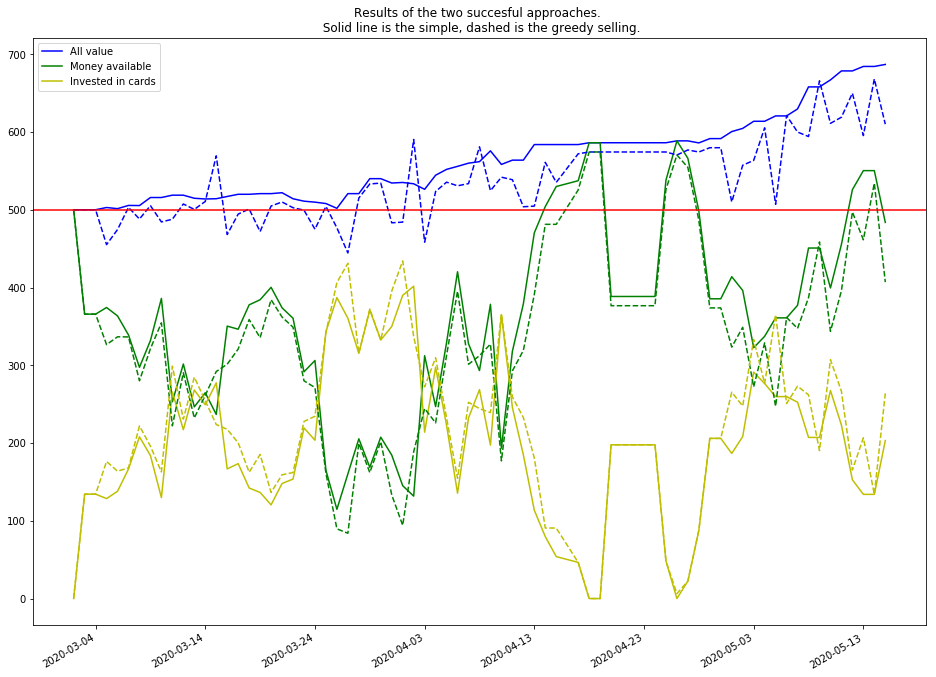

In [754]:
plt.figure(figsize=(16,12))

plt.plot(simple_sell.date, simple_sell.money_available+simple_sell.money_in_cards, "b-", label="All value")
plt.plot(simple_sell.date, simple_sell.money_available, "g-", label="Money available")
plt.plot(simple_sell.date, simple_sell.money_in_cards, "y-", label="Invested in cards")
plt.plot(greedy_sell.date, greedy_sell.money_available+simple_sell.money_in_cards, "b--", label="_nolegend_")
plt.plot(greedy_sell.date, greedy_sell.money_available, "g--", label="_nolegend_")
plt.plot(greedy_sell.date, greedy_sell.money_in_cards, "y--", label="_nolegend_")
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
x,y=plt.xlim()
plt.plot([x-1, y+1], [500,500], "r-", label="_nolegend_")
plt.xlim(x,y)
plt.title ("Results of the two succesful approaches. \n Solid line is the simple, dashed is the greedy selling.")

It can be seen that the greedy selling sometimes can succeed the potential of the simplistic approach, but in most cases it just results in net loss compared to it. 

This can be explained through multiple approaches:

One is the most straightforward: The greedy selling algorithm is not refined enough, one would need more/different conditions in order for it to work. It also seems to be an issue that it sells when the slope changed for the worse - rather than predicting this proactively.

The second explanation could be that the buying mechanism at hand aims to exploit the sudden down-spikes in prices rather than general trends, which means that the most optimal selling route is indeed the simplistic. Anything other than this - especially the greedy one that is aimed towards longer term behaviours - will be less optimal in the long run.

I have a feeling that here I'm looking at a little bit of both, but I don't think solving the problems with the greedy one would worth it without employing machine learning. 

As a last effort in this notebook I shall run the best approach (the spike exploit with simplistic selling functions) on data from March 3rd until July 1st. This is the point when I no longer think it is worth buying cards of the previous rotations (2 months before the end of their standard-legality). There I will have to implement new restrictions, but that would happen later  -if ever. Right now I don't think refining this part of the investigation would be worthwile.

In [758]:
second_run=pd.date_range("2020-03-03", "2020-07-01")
collection=[500, pd.DataFrame(columns=["name","isFoil", "Qtty", "Bought_price", "Current_price","Bought_date" ])] # this is the object that will get passed around by every function
#bought price is average - since that is what I need to exceed in order to sell with a profit...
#This was at the start, but from now I will run a different one
all_cards=pd.read_csv("past_data.csv")
all_cards.date=all_cards.date.astype('datetime64[D]')#this has to happen...
#rules_to_buy=[spiked_down, raising_value]
rules_to_buy=[spiked_down]
for a_day in second_run:
    all_cards=one_day(a_day, all_cards, collection)

The selling phase have ended
The buying phase have ended
On 2020-03-03 the algorithm has 365.74$ at its disposal, and 134.26$ in card values of 8 cards. 
 This means that the total value is 500.0$ and 0.0$ have been lost
Day_over
The selling phase have ended
The buying phase have ended
On 2020-03-04 the algorithm has 365.74$ at its disposal, and 134.26$ in card values of 8 cards. 
 This means that the total value is 500.0$ and 0.0$ have been lost
Day_over
The selling phase have ended
The buying phase have ended
On 2020-03-05 the algorithm has 374.3$ at its disposal, and 128.57$ in card values of 11 cards. 
 This means that the total value is 502.87$ and 2.87$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-03-06 the algorithm has 363.48$ at its disposal, and 137.94$ in card values of 12 cards. 
 This means that the total value is 501.42$ and 1.42$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-03-07 

The selling phase have ended
The buying phase have ended
On 2020-04-07 the algorithm has 327.58$ at its disposal, and 232.3$ in card values of 18 cards. 
 This means that the total value is 559.88$ and 59.88$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-04-08 the algorithm has 293.21$ at its disposal, and 268.65$ in card values of 19 cards. 
 This means that the total value is 561.86$ and 61.86$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-04-09 the algorithm has 378.41$ at its disposal, and 197.31$ in card values of 13 cards. 
 This means that the total value is 575.72$ and 75.72$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-04-10 the algorithm has 193.46$ at its disposal, and 364.82$ in card values of 26 cards. 
 This means that the total value is 558.28$ and 58.28$ have been gained
Day_over
The selling phase have ended
The buying phase have ended


The selling phase have ended
The buying phase have ended
On 2020-05-13 the algorithm has 550.3$ at its disposal, and 133.99$ in card values of 8 cards. 
 This means that the total value is 684.29$ and 184.29$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-05-14 the algorithm has 550.3$ at its disposal, and 133.99$ in card values of 8 cards. 
 This means that the total value is 684.29$ and 184.29$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-05-15 the algorithm has 483.72$ at its disposal, and 203.13$ in card values of 10 cards. 
 This means that the total value is 686.85$ and 186.85$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-05-16 the algorithm has 438.76$ at its disposal, and 252.37$ in card values of 11 cards. 
 This means that the total value is 691.13$ and 191.13$ have been gained
Day_over
The selling phase have ended
The buying phase have ended

The selling phase have ended
The buying phase have ended
On 2020-06-17 the algorithm has 271.91$ at its disposal, and 457.4$ in card values of 21 cards. 
 This means that the total value is 729.31$ and 229.31$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-06-18 the algorithm has 274.75$ at its disposal, and 482.98$ in card values of 26 cards. 
 This means that the total value is 757.73$ and 257.73$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-06-19 the algorithm has 66.64$ at its disposal, and 658.19$ in card values of 39 cards. 
 This means that the total value is 724.83$ and 224.83$ have been gained
Day_over
The selling phase have ended
The buying phase have ended
On 2020-06-20 the algorithm has 72.24$ at its disposal, and 652.59$ in card values of 38 cards. 
 This means that the total value is 724.83$ and 224.83$ have been gained
Day_over
The selling phase have ended
The buying phase have ende

Text(0.5, 1.0, 'The most successful hand-built approach over the course of 4 months')

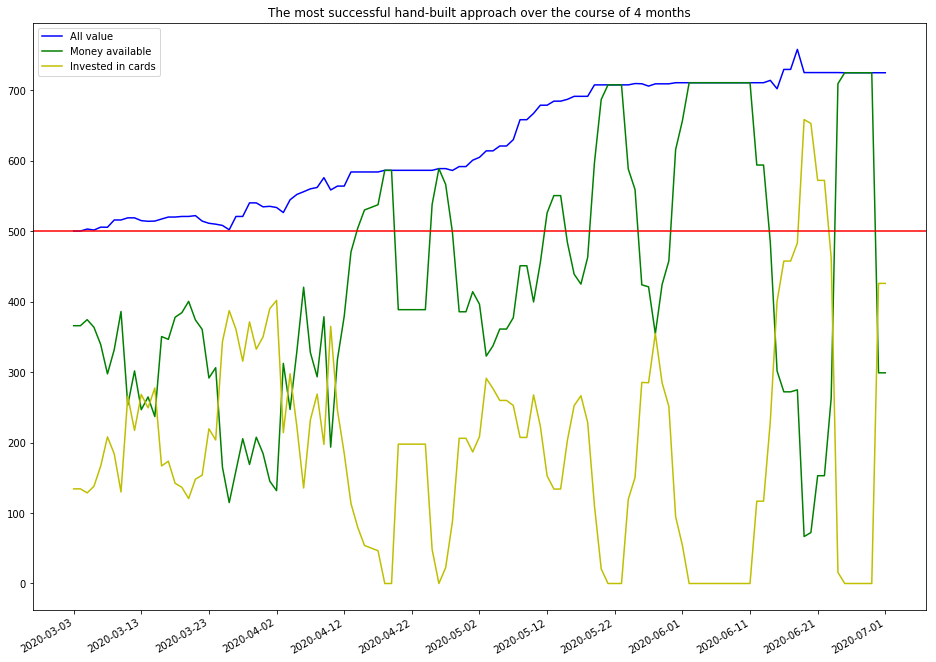

In [759]:
simple_sell=pd.read_csv("sum_the_strat.csv", sep=";", names=["date", "money_available", "money_in_cards", "#foils", "#nonfoils"])
simple_sell.date=simple_sell.date.astype('datetime64[D]')


#reused
plt.figure(figsize=(16,12))

plt.plot(simple_sell.date, simple_sell.money_available+simple_sell.money_in_cards, "b-", label="All value")
plt.plot(simple_sell.date, simple_sell.money_available, "g-", label="Money available")
plt.plot(simple_sell.date, simple_sell.money_in_cards, "y-", label="Invested in cards")

plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
x,y=plt.xlim()
plt.plot([x-1, y+1], [500,500], "r-", label="_nolegend_")
plt.xlim(x,y)
plt.title ("The most successful hand-built approach over the course of 4 months")

A defining feature of this graph is the plateau that starts around the end of May.

I could go into another investigation (similarly to the first) regarding what exactly happened there, and probably will later. 
For the time being, I can only speculate though. For now, I would say I can think of three reasons or a combination of them:
    - This is very likely, that the COVID-19 pandemic have reached a point when players started to realize that the in-person events will likely be cancelled. This realization might have an effect to freeze the card prices or even send them into a downward spiral...
    - I don't know how likely it is, but the rotation happened around the middle of September and the new core set is released in August. It is possible that the meta got into a "standstill" before that, and this caused the phenomenon. 
    - The third reason can be once again a standstill in the meta, just from another perspective: a single (or two) too dominant decks that made everything else useless before a few bans/restrictions/counter cards emerged. 

While it would be interesting to follow up on these speculations - and I'm certain that the data contains clues about which one this was - I will not continue it for now for two reasons: The first is that I'm much more interested in trying a few ML algorithms for the buying (and potentially the selling) control and am eager to see how much I can improve on this simple model. The second reason is much more prose-like: I would bet that any pro player could and would easily answer which of the factors contributed the most - or what happened to the scene around that time - without ever looking at the data I have accomulated here.

In [763]:
(simple_sell.money_available+simple_sell.money_in_cards).max()

757.73